# #TC1002s - CS Tool - Mastering Analytics
##Challenge Work
##Noel Sebastian Marquez Tovar - A01659730
##Angel Guillermo Bosquez Baltazar - A01667100






Hypothesis 2 – ESRB Rating Influences Sales by Region

Video game ESRB ratings are not equally successful across different world regions; some ratings (E, T, M, AO…) perform significantly better in markets like North America, Europe or Japan.

------
**To determine this, we used a SMART methodology:**

* **S (Specific):** Use sales data broken down by ESRB rating in North America (NA), Europe (EU) and Japan (JP).
* **M (Measurable):** Variables:

  * **Rating** (ESRB category)
  * **NA_Sales**, **EU_Sales**, **JP_Sales** (millions of units)
  * **Popular rating** in a region: ≥ 300 million units sold **and** ≥ 3 representative titles in the chart
  * **Popular game** in a region: ≥ 3 million units sold within that region
* **A (Achievable):** All required data are in the chosen dataset; tools: Pandas, Matplotlib, Seaborn, scikit-learn (KMeans & PCA)
* **R (Relevant):** Understanding which ratings drive sales per region guides developers/marketers in content rating strategies and localization.
* **T (Time-bound):** Analysis performed during Semana Tec, **May 5–9**.
------
**Visualization for analysis:**

* Horizontal bar charts of **average sales per rating by region**, highlighting—for example—“E” titles’ strength in JP, “M” titles in NA, etc.
* Top 10 most-sold titles per region, colored by rating; repeated with “AO” titles removed to reveal hidden patterns (e.g., “T” games in EU).
------



 Hypothesis 1 – Genre Popularity Varies by Region

 Video game genres are not equally popular across different world regions, some genres perform significantly better in certain markets like North America, Europe, or Japan

------
 To determine this, we used a smart methodology
 S: We use sales data from North America (NA), Europe (EU) and Japan (JP), these markets are big enough in sales to be representative of the diversity in taste

 M: We used the following variables, Genre(this is a game category) and NA_Sales, EU_Sales, JP_Sales(sales in millions of units)

 To define a genre as "popula" in a region, it should accumulate more than 300 million units sold in a region. Also it should be reflected in the chart of popular games with at least three representatives

 To define a game as "popular" in a region, it should have at least 3 million units sold within that region

 A: All data is available in the dataset that was chosen and the tools used were explained to us in this course (Pandas, Matplotlib, Seaborn) specifically plotting. heatmaps and an additional wordmap

 R: Knowing genre preferences by world regions can be used for future game developing and marketing, helping developers to create/localize the right title for each market

 T: This analysis will be conducted in the Semana Tec period from May 5th through 9th

---------

 Visualization for analysis:

-A set of horizontal charts show the average sale for each genre by region. This highlighted the popularity of role-palying games in Japan. Sports and Action games in Europe, while the popular games in NA belong in the Shooter and action genre

-We also made charts for the top 10 popular games by region, this step was repeated with and without Nintendo games, revealing how Nintendo changes the genre distribution, especially in Japan. Removing Nintendo from the ecuation revealed hidden genre patterns like racing and platform games in EU and JP

There is a clear difference in taste between regions.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Video_Games.csv')

In [ ]:
import re

def clean_text(text):
  if not isinstance(text, str):
    text = str(text)
  text = text.lower()
  text = re.sub(r'[^a-záéíóúüñ]', '', text)
  return text

df['Name_clean'] = df['Name'].apply(clean_text)
df['Platform_clean'] = df['Platform'].apply(clean_text)
df['Genre_clean'] = df['Genre'].apply(clean_text)


print(df[['Name', 'Name_clean']])




                                             Name  \
0                                      Wii Sports   
1                               Super Mario Bros.   
2                                  Mario Kart Wii   
3                               Wii Sports Resort   
4                        Pokemon Red/Pokemon Blue   
...                                           ...   
16923                    Aliens: Colonial Marines   
16924  Backyard Wrestling: Don't Try This at Home   
16925                          Yakuza: Dead Souls   
16926                         Fight Night Round 2   
16927           MonHun Nikki: Poka Poka Ailu Mura   

                               Name_clean  
0                               wiisports  
1                          supermariobros  
2                            mariokartwii  
3                         wiisportsresort  
4                   pokemonredpokemonblue  
...                                   ...  
16923               alienscolonialmarines  
16924  back

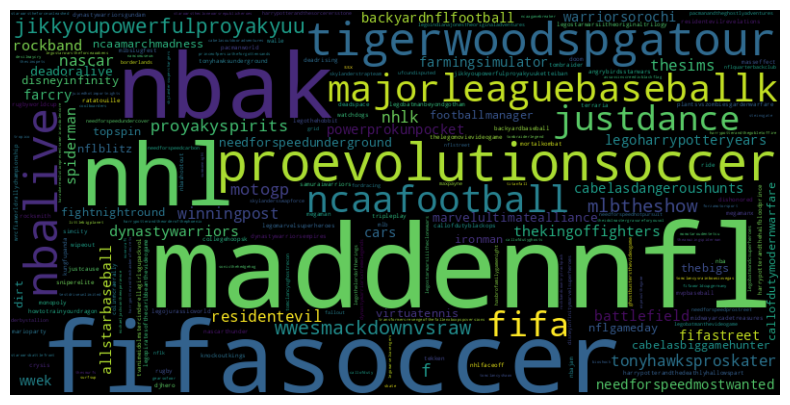

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer



# 1)cleans all the titles
text = ' '.join(df['Name_clean'].dropna())

# 2) how many times the word is repeated
freqs = Counter(text.split())

# 3) it generates  the cloud through it
wc = WordCloud(
    width=800,
    height=400,
    max_words=200,
    max_font_size=120,
    relative_scaling=0.5  #it scales lineally
).generate_from_frequencies(freqs)

# 4)shows the result
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


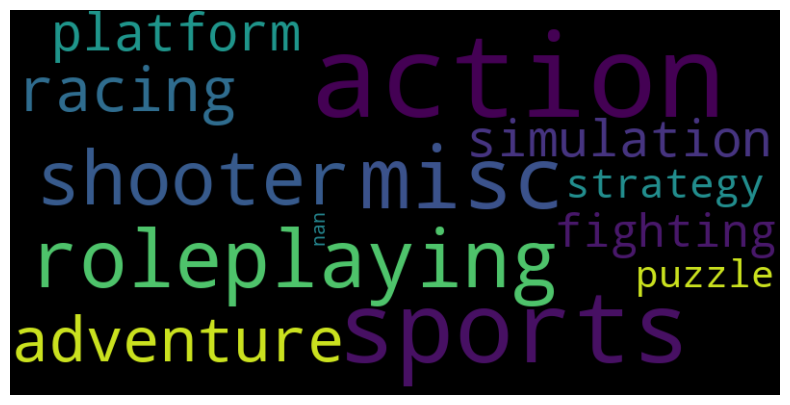

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1) it joins all the clean titles
text = ' '.join(df['Genre_clean'].dropna())

# 2) Chow many times does the word appear
freqs = Counter(text.split())

# 3) generates the cloud the cloud from this sequence
wc = WordCloud(
    width=800,
    height=400,
    max_words=200,
    max_font_size=120,
    relative_scaling=0.5
).generate_from_frequencies(freqs)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


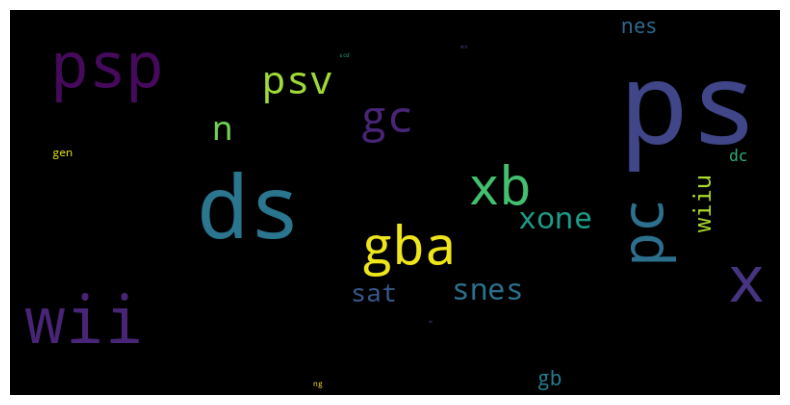

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['Platform_clean'].dropna())

freqs = Counter(text.split())

wc = WordCloud(
    width=800,
    height=400,
    max_words=200,
    max_font_size=120,
    relative_scaling=0.5
).generate_from_frequencies(freqs)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


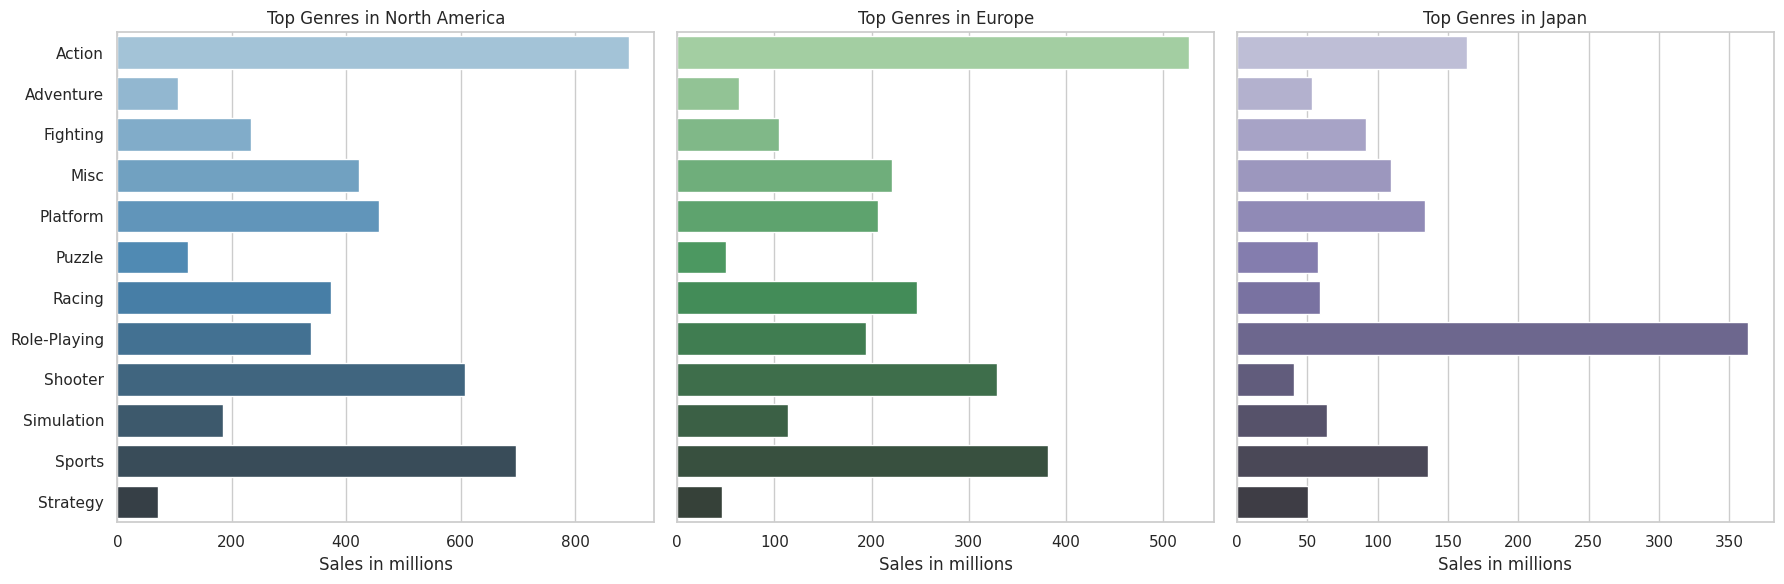

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


use_total = True  #false so it uses the average

#we group by genre and calculate the total
agg_func = 'sum' if use_total else 'mean'
region_sales = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].agg(agg_func).reset_index()

#visual style
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# na region plot
sns.barplot(
    data=region_sales,
    x="NA_Sales",
    y="Genre",
    hue="Genre",
    palette="Blues_d",
    ax=axes[0],
    dodge=False,
    legend=False
)
axes[0].set_title("Top Genres in North America")
axes[0].set_xlabel("Sales in millions")
axes[0].set_ylabel("")

# eu region plot
sns.barplot(
    data=region_sales,
    x="EU_Sales",
    y="Genre",
    hue="Genre",
    palette="Greens_d",
    ax=axes[1],
    dodge=False,
    legend=False
)
axes[1].set_title("Top Genres in Europe")
axes[1].set_xlabel("Sales in millions")
axes[1].set_ylabel("")

# jp region plot
sns.barplot(
    data=region_sales,
    x="JP_Sales",
    y="Genre",
    hue="Genre",
    palette="Purples_d",
    ax=axes[2],
    dodge=False,
    legend=False
)
axes[2].set_title("Top Genres in Japan")
axes[2].set_xlabel("Sales in millions")
axes[2].set_ylabel("")

# adjust ddesgn
plt.tight_layout()
plt.show()


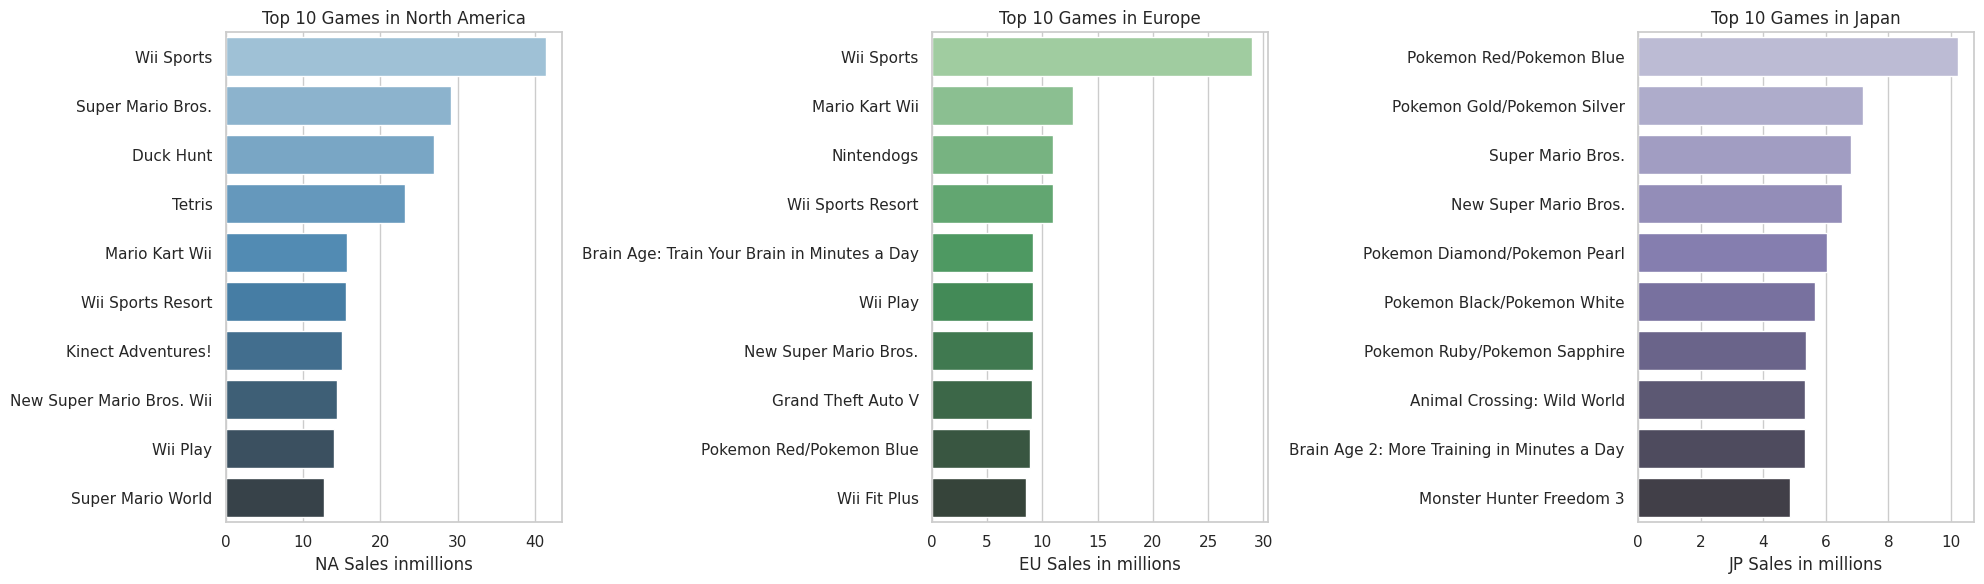

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#clean missing values
df_clean = df.dropna(subset=["Name", "NA_Sales", "EU_Sales", "JP_Sales"])

#pics the top 10 by region
top_na = df_clean.sort_values("NA_Sales", ascending=False).head(10)
top_eu = df_clean.sort_values("EU_Sales", ascending=False).head(10)
top_jp = df_clean.sort_values("JP_Sales", ascending=False).head(10)

#we pick a seaborn visual style
sns.set(style="whitegrid")

#we create a subplot with 3 coluns
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=False)

# top na
sns.barplot(data=top_na, y="Name", x="NA_Sales", hue="Name", dodge=False,
            ax=axes[0], palette="Blues_d", legend=False)
axes[0].set_title("Top 10 Games in North America")
axes[0].set_xlabel("NA Sales inmillions")
axes[0].set_ylabel("")

# top eu
sns.barplot(data=top_eu, y="Name", x="EU_Sales", hue="Name", dodge=False,
            ax=axes[1], palette="Greens_d", legend=False)
axes[1].set_title("Top 10 Games in Europe")
axes[1].set_xlabel("EU Sales in millions")
axes[1].set_ylabel("")

# top jp
sns.barplot(data=top_jp, y="Name", x="JP_Sales", hue="Name", dodge=False,
            ax=axes[2], palette="Purples_d", legend=False)
axes[2].set_title("Top 10 Games in Japan")
axes[2].set_xlabel("JP Sales in millions")
axes[2].set_ylabel("")

# adjusting the layout
plt.tight_layout()
plt.show()


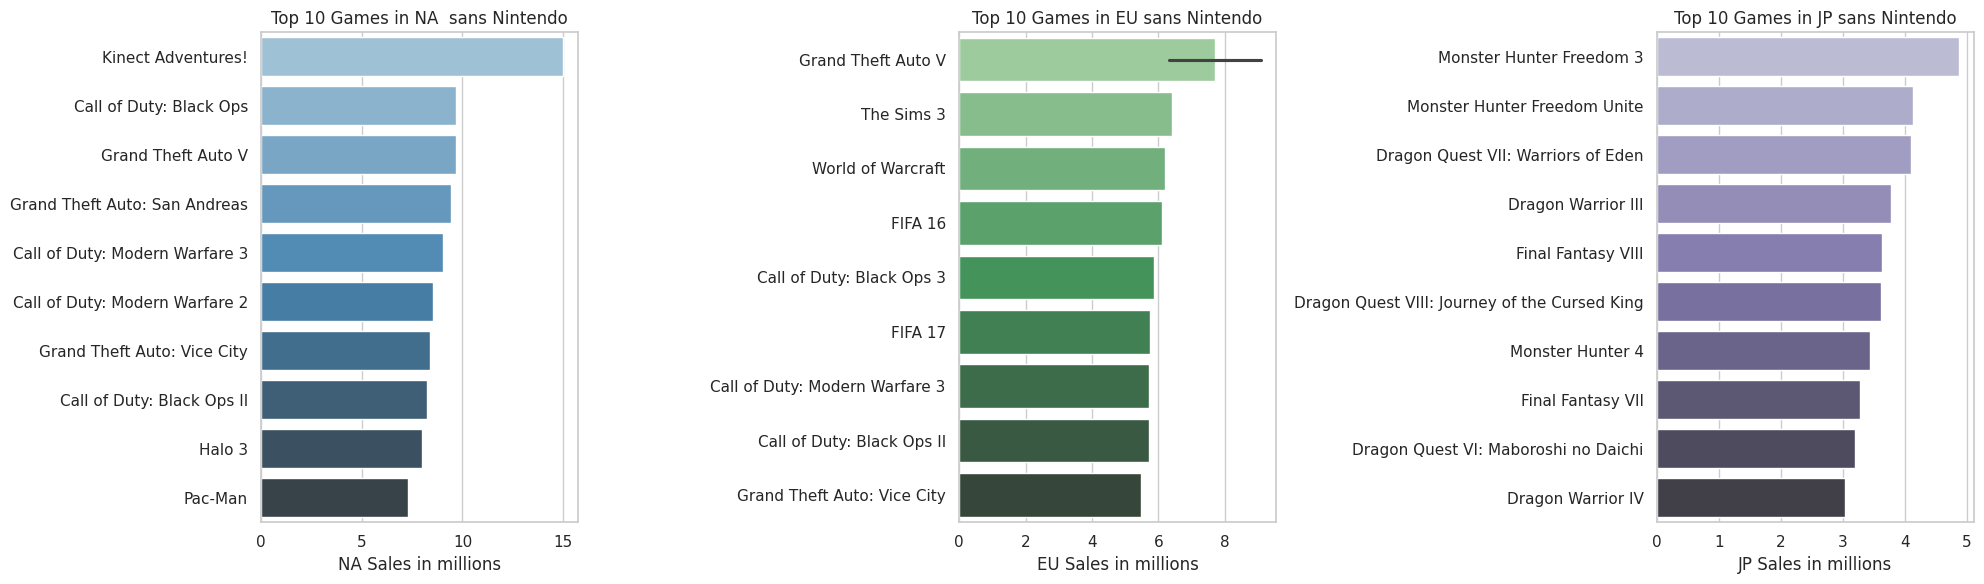

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#filtering nintendo
df_without_nintendo = df[df["Publisher"].str.lower() != "nintendo"]

#deleting empty values
df_without_nintendo_clean = df_without_nintendo.dropna(subset=["Name", "NA_Sales", "EU_Sales", "JP_Sales"])

#top 10 by region
top_na_wo = df_without_nintendo_clean.sort_values("NA_Sales", ascending=False).head(10)
top_eu_wo = df_without_nintendo_clean.sort_values("EU_Sales", ascending=False).head(10)
top_jp_wo = df_without_nintendo_clean.sort_values("JP_Sales", ascending=False).head(10)

# visual style
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# na plot
sns.barplot(data=top_na_wo, y="Name", x="NA_Sales", hue="Name", dodge=False, legend=False,
            ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Games in NA  sans Nintendo")
axes[0].set_xlabel("NA Sales in millions")
axes[0].set_ylabel("")

# eu plot
sns.barplot(data=top_eu_wo, y="Name", x="EU_Sales", hue="Name", dodge=False, legend=False,
            ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 10 Games in EU sans Nintendo")
axes[1].set_xlabel("EU Sales in millions")
axes[1].set_ylabel("")

# Gjp plot
sns.barplot(data=top_jp_wo, y="Name", x="JP_Sales", hue="Name", dodge=False, legend=False,
            ax=axes[2], palette="Purples_d")
axes[2].set_title("Top 10 Games in JP sans Nintendo")
axes[2].set_xlabel("JP Sales in millions")
axes[2].set_ylabel("")

# Ajustar diseño
plt.tight_layout()
plt.show()


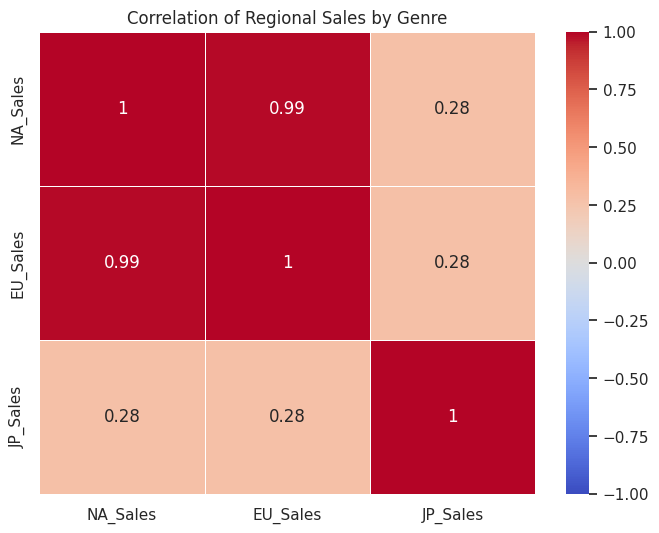

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#genre and sales by region grouping
genre_region_sales = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum()

#corr matrix
corr_matrix = genre_region_sales.corr()

#heatmap plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation of Regional Sales by Genre")
plt.show()


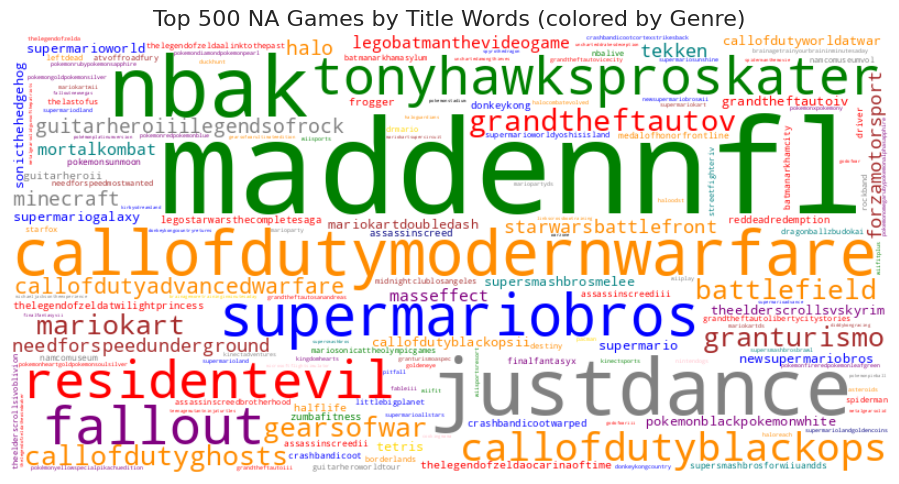

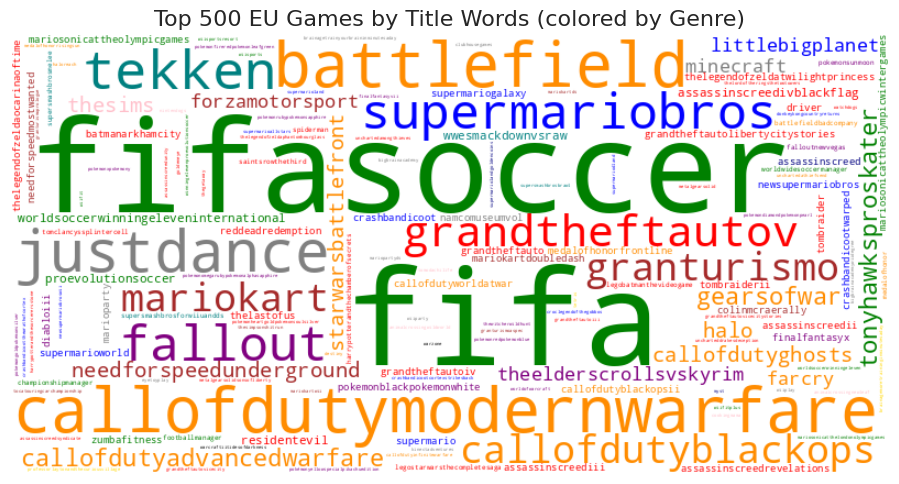

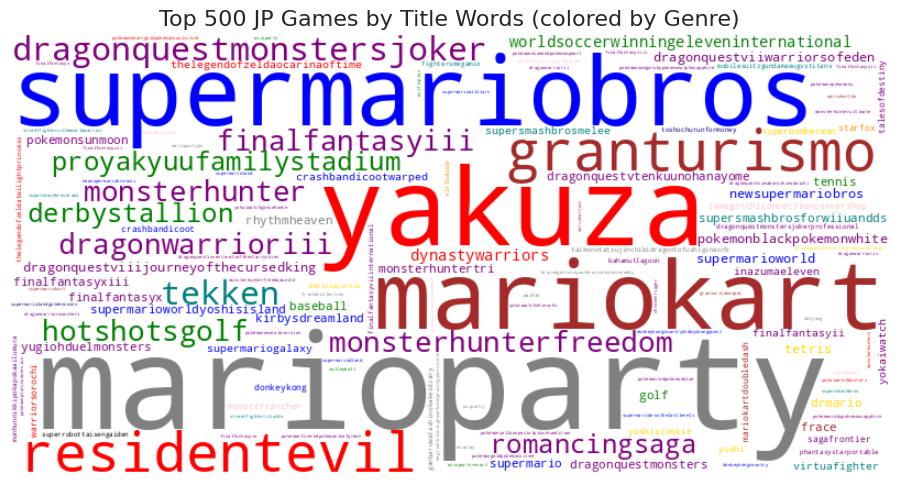

In [ ]:
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

#custom colors by genre
genre_colors = {
    "Action": "red",
    "Shooter": "darkorange",
    "Sports": "green",
    "Role-Playing": "purple",
    "Platform": "blue",
    "Misc": "gray",
    "Fighting": "teal",
    "Racing": "brown",
    "Simulation": "pink",
    "Puzzle": "gold",
    "Adventure": "navy",
    "Strategy": "black",
}

# we associate word by genre
word_genre_map = defaultdict(lambda: "gray")
word_counts_by_genre = defaultdict(lambda: defaultdict(int))

for _, row in df.dropna(subset=["Name_clean", "Genre"]).iterrows():
    words = row["Name_clean"].split()
    genre = row["Genre"]
    for word in words:
        word_counts_by_genre[word][genre] += 1

for word, genre_count in word_counts_by_genre.items():
    dominant_genre = max(genre_count, key=genre_count.get)
    word_genre_map[word] = dominant_genre

#color function
def color_func(word, **kwargs):
    genre = word_genre_map.get(word, "Misc")
    return genre_colors.get(genre, "gray")

# function to generate wordcloud by region
def plot_wordcloud(region_df, title):
    text = ' '.join(region_df['Name_clean'].dropna())
    freqs = Counter(text.split())
    wc = WordCloud(
        width=800,
        height=400,
        max_words=200,
        max_font_size=120,
        relative_scaling=0.5,
        color_func=color_func,
        background_color='white'
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# step 4, we chart the results
top_na = df.sort_values("NA_Sales", ascending=False).head(500)
top_eu = df.sort_values("EU_Sales", ascending=False).head(500)
top_jp = df.sort_values("JP_Sales", ascending=False).head(500)

plot_wordcloud(top_na, "Top 500 NA Games by Title Words (colored by Genre)")
plot_wordcloud(top_eu, "Top 500 EU Games by Title Words (colored by Genre)")
plot_wordcloud(top_jp, "Top 500 JP Games by Title Words (colored by Genre)")



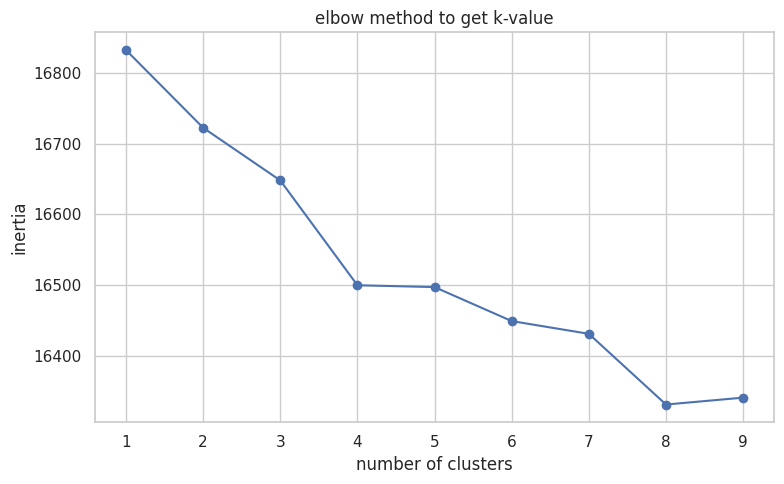

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_tfidf)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.title("elbow method to get k-value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_tfidf)
terms = vectorizer.get_feature_names_out()
centroids = kmeans.cluster_centers_

for i in range(k):
    top_indices = centroids[i].argsort()[-5:][::-1]
    top_terms = [terms[j] for j in top_indices]
    print(f"Cluster {i} top terms:", top_terms)

Cluster 0 top terms: ['the', 'of', 'game', 'and', 'sims']
Cluster 1 top terms: ['nba', 'live', 'jam', 'shootout', 'street']
Cluster 2 top terms: ['soccer', 'fifa', 'evolution', 'pro', 'world']
Cluster 3 top terms: ['no', 'nfl', 'world', 'super', 'nhl']


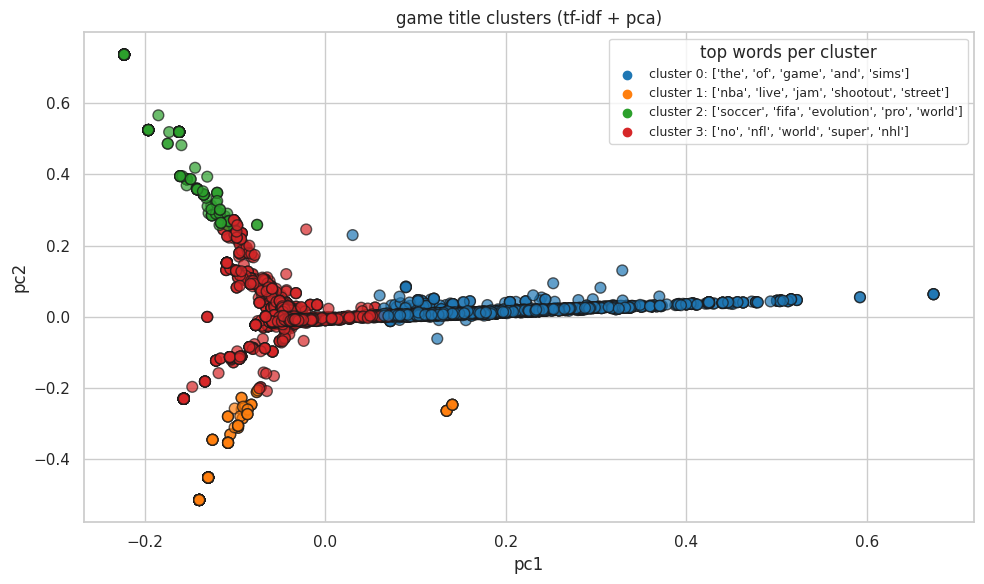

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

# run k-means clustering on the TF-IDF vectors
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["name_cluster"] = kmeans.fit_predict(X_tfidf)


# reduce tf-idf vectors to 2d using pca
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# define cluster colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # add more if you got more clusters
cluster_colors = [colors[label] for label in df["name_cluster"]]

# quick labels for each cluster based on common words
cluster_labels = {
    0: "cluster 0: ['the', 'of', 'game', 'and', 'sims']",
    1: "cluster 1: ['nba', 'live', 'jam', 'shootout', 'street']",
    2: "cluster 2: ['soccer', 'fifa', 'evolution', 'pro', 'world']",
    3: "cluster 3: ['no', 'nfl', 'world', 'super', 'nhl']"
}

# plot the scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=cluster_colors,
    alpha=0.7,
    s=60,
    edgecolors='k'
)

# add fake points just to build the legend
for cluster_id, label in cluster_labels.items():
    plt.scatter([], [], color=colors[cluster_id], label=label)

# basic stuff for layout
plt.title("game title clusters (tf-idf + pca)")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.legend(title="top words per cluster", loc='best', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# notes:
# pc1 and pc2 = first 2 principal components from pca (dimensionality reduction)
# each dot = one game title, based on text similarity
# colors = k-means clusters
# legend = gives you top words so you know the theme of each group



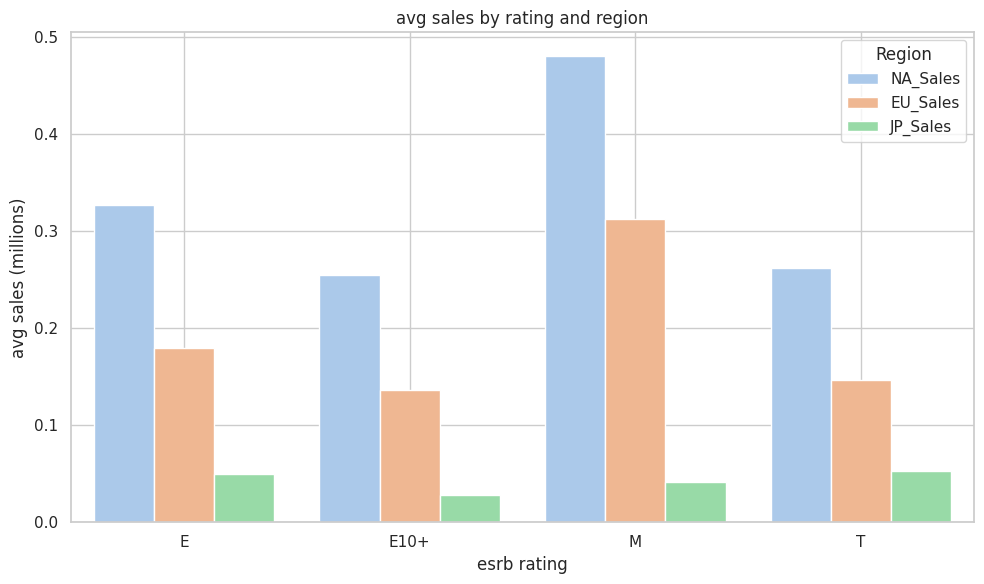

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# remove rows with missing values for rating and sales
df_rating_clean = df.dropna(subset=["Rating", "NA_Sales", "EU_Sales", "JP_Sales"])

# keep only common ratings we're interested in
valid_ratings = ["E", "E10+", "T", "M"]
df_rating_clean = df_rating_clean[df_rating_clean["Rating"].isin(valid_ratings)]

# group by rating and calculate avg sales for each region
rating_sales = df_rating_clean.groupby("Rating")[["NA_Sales", "EU_Sales", "JP_Sales"]].mean().reset_index()

# reshape data to long format for sns
rating_sales_melted = pd.melt(
    rating_sales,
    id_vars="Rating",
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales"],
    var_name="Region",
    value_name="Average_Sales"
)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_sales_melted, x="Rating", y="Average_Sales", hue="Region", palette="pastel")

# titles and axes
plt.title("avg sales by rating and region")
plt.ylabel("avg sales (millions)")
plt.xlabel("esrb rating")
plt.grid(True)
plt.tight_layout()
plt.show()

# notes:
# this shows which game ratings (E, T, M, etc) sell more on avg in NA/EU/JP
# helps us spot trends like kid-friendly games doing well in japan, maybe M games more in NA, etc



<ipython-input-2-997e4155fa08>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rating_sales, x="NA_Sales", y="Rating", ax=axes[0], palette="Blues_d")
<ipython-input-2-997e4155fa08>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rating_sales, x="EU_Sales", y="Rating", ax=axes[1], palette="Greens_d")
<ipython-input-2-997e4155fa08>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rating_sales, x="JP_Sales", y="Rating", ax=axes[2], palette="Purples_d")


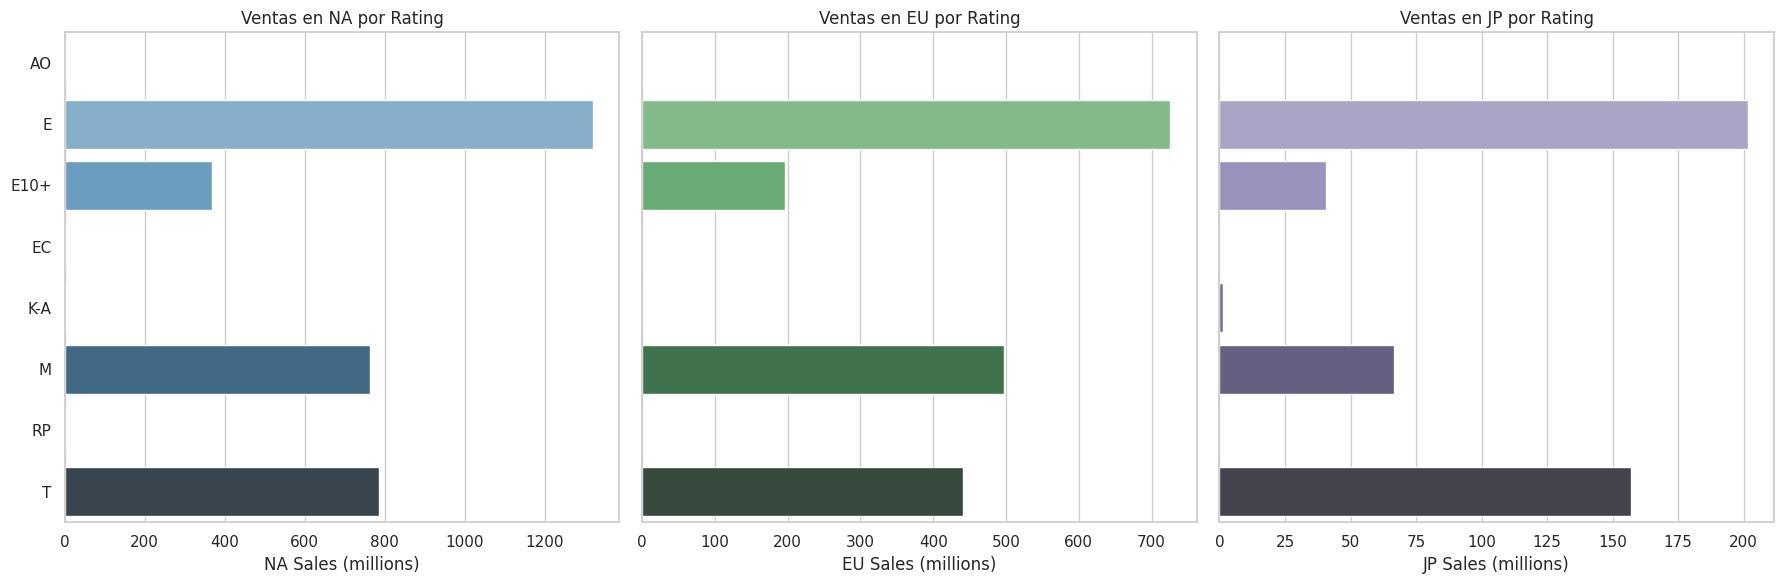

In [ ]:
# Prepare the environment for plotting and clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("Video_Games.csv")

# Basic cleaning: drop rows with missing required values
df_clean = df.dropna(subset=["Rating", "NA_Sales", "EU_Sales", "JP_Sales"])

# ============================================
# SECTION 1: Visualization - Sales by Rating and Region
# ============================================

# Group by rating and sum sales per region
region_rating_sales = df_clean.groupby("Rating")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum().reset_index()

# Create subplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# NA sales plot
sns.barplot(data=region_rating_sales, x="NA_Sales", y="Rating", ax=axes[0], palette="Blues_d")
axes[0].set_title("NA Sales by Rating")
axes[0].set_xlabel("NA Sales (millions)")
axes[0].set_ylabel("")

# EU sales plot
sns.barplot(data=region_rating_sales, x="EU_Sales", y="Rating", ax=axes[1], palette="Greens_d")
axes[1].set_title("EU Sales by Rating")
axes[1].set_xlabel("EU Sales (millions)")
axes[1].set_ylabel("")

# JP sales plot
sns.barplot(data=region_rating_sales, x="JP_Sales", y="Rating", ax=axes[2], palette="Purples_d")
axes[2].set_title("JP Sales by Rating")
axes[2].set_xlabel("JP Sales (millions)")
axes[2].set_ylabel("")

plt.tight_layout()

# We found missing values, so we'll filter them in the next section

<ipython-input-4-3ecda3522358>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rating_sales, x="NA_Sales", y="Rating", ax=axes[0], palette="Blues_d")
<ipython-input-4-3ecda3522358>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rating_sales, x="EU_Sales", y="Rating", ax=axes[1], palette="Greens_d")
<ipython-input-4-3ecda3522358>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rating_sales, x="JP_Sales", y="Rating", ax=axes[2], palette="Purples_d")


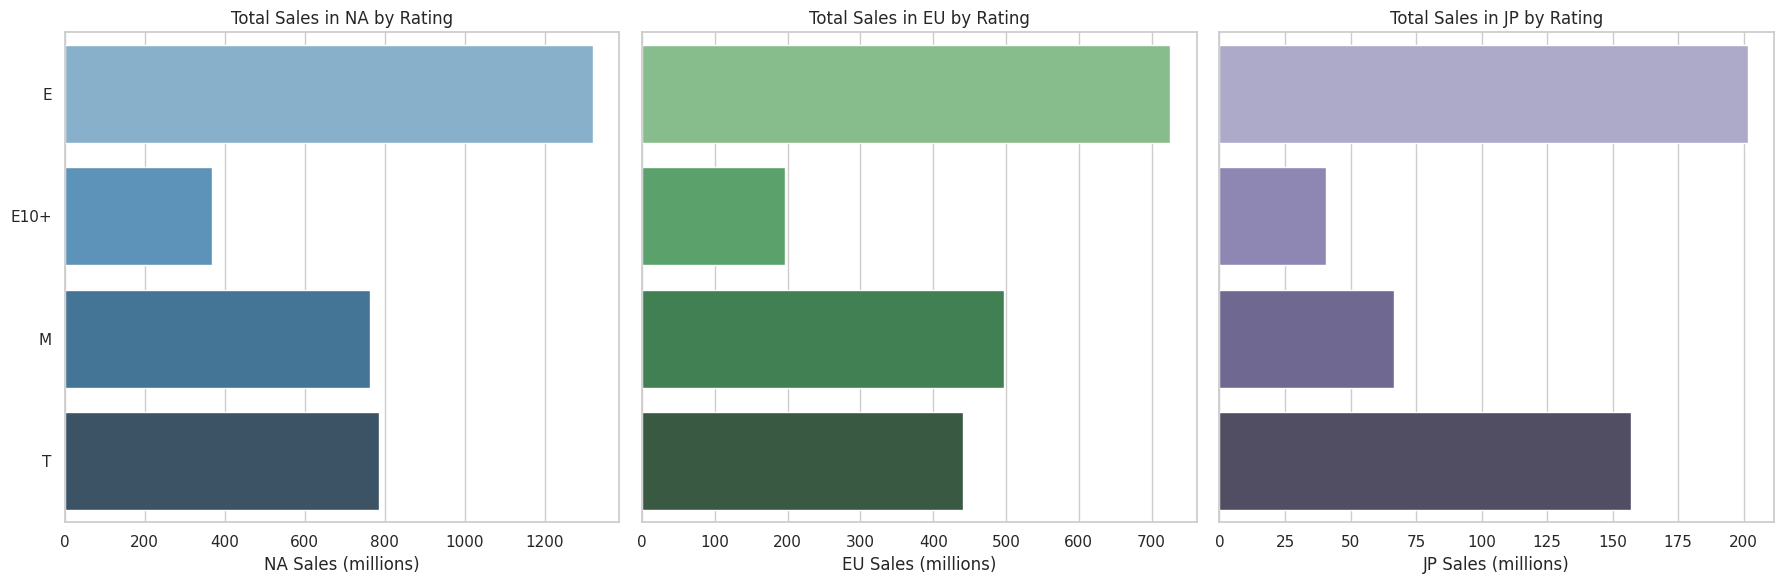

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load and filtering of data
df = pd.read_csv("Video_Games.csv")
valid_ratings = ["E", "E10+", "T", "M"]
df_clean = df.dropna(subset=["Rating", "NA_Sales", "EU_Sales", "JP_Sales"])
df_filtered = df_clean[df_clean["Rating"].isin(valid_ratings)]

#we group by rating and we sum the sales for each region
region_rating_sales = df_filtered.groupby("Rating")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum().reset_index()

#graphics by region
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=region_rating_sales, x="NA_Sales", y="Rating", ax=axes[0], palette="Blues_d")
axes[0].set_title("Total Sales in NA by Rating")
axes[0].set_xlabel("NA Sales (millions)")
axes[0].set_ylabel("")

sns.barplot(data=region_rating_sales, x="EU_Sales", y="Rating", ax=axes[1], palette="Greens_d")
axes[1].set_title("Total Sales in EU by Rating")
axes[1].set_xlabel("EU Sales (millions)")
axes[1].set_ylabel("")

sns.barplot(data=region_rating_sales, x="JP_Sales", y="Rating", ax=axes[2], palette="Purples_d")
axes[2].set_title("Total Sales in JP by Rating")
axes[2].set_xlabel("JP Sales (millions)")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


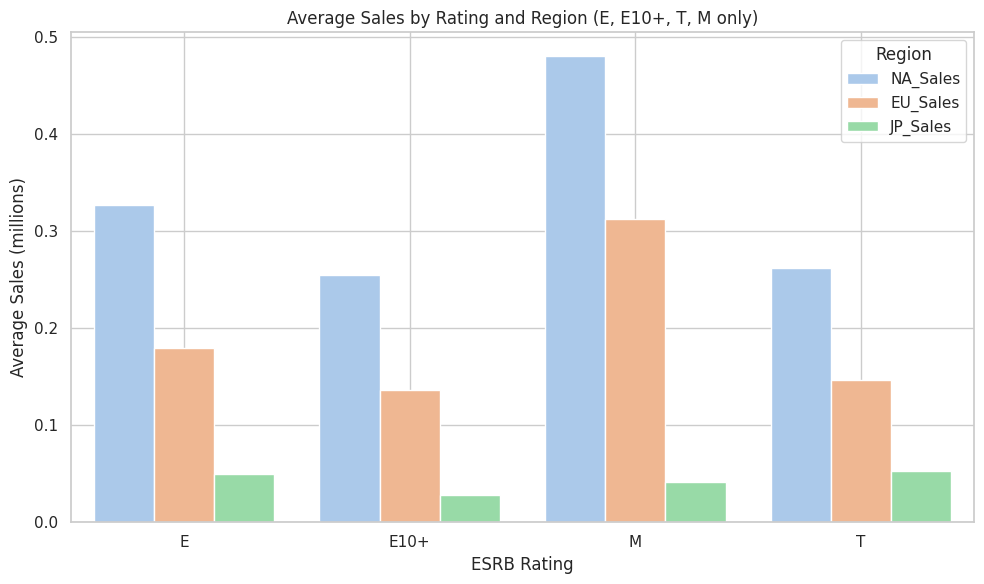

In [ ]:
# we group by rating and we calcualte by average sales by region
rating_sales_avg = df_filtered.groupby("Rating")[["NA_Sales", "EU_Sales", "JP_Sales"]].mean().reset_index()

#cconverting to a long format
rating_sales_melted = pd.melt(
    rating_sales_avg,
    id_vars="Rating",
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales"],
    var_name="Region",
    value_name="Average_Sales"
)

#graphics chart
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_sales_melted, x="Rating", y="Average_Sales", hue="Region", palette="pastel")

plt.title("Average Sales by Rating and Region (E, E10+, T, M only)")
plt.ylabel("Average Sales (millions)")
plt.xlabel("ESRB Rating")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Filter and encode data
df_clean = df.dropna(subset=["Rating", "NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"])
df_clean = df_clean.copy()
df_clean["Rating_Code"] = df_clean["Rating"].astype("category").cat.codes

# Features for clustering
X = df_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales", "Rating_Code"]]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clean.loc[:, "Cluster"] = clusters  # <- avoids the warning

# Display examples per cluster
for i in range(4):
    print(f"\nCluster {i} examples:")
    print(df_clean[df_clean["Cluster"] == i][["Name", "Rating", "NA_Sales", "EU_Sales", "JP_Sales"]].head(3))




Cluster 0 examples:
                    Name Rating  NA_Sales  EU_Sales  JP_Sales
154              Destiny      T      2.49      2.07      0.16
159  Assassin's Creed II      M      2.54      1.93      0.21
160     Assassin's Creed      M      3.28      1.64      0.07

Cluster 1 examples:
                    Name Rating  NA_Sales  EU_Sales  JP_Sales
2         Mario Kart Wii      E     15.68     12.76      3.79
3      Wii Sports Resort      E     15.61     10.93      3.28
6  New Super Mario Bros.      E     11.28      9.14      6.50

Cluster 2 examples:
         Name Rating  NA_Sales  EU_Sales  JP_Sales
0  Wii Sports      E     41.36     28.96      3.77

Cluster 3 examples:
                                  Name Rating  NA_Sales  EU_Sales  JP_Sales
155  LEGO Star Wars: The Complete Saga   E10+      3.57      1.55      0.00
156                       Cooking Mama      E      3.07      1.91      0.07
161                 Forza Motorsport 3      E      2.99      1.90      0.10


<ipython-input-35-6030157404e8>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


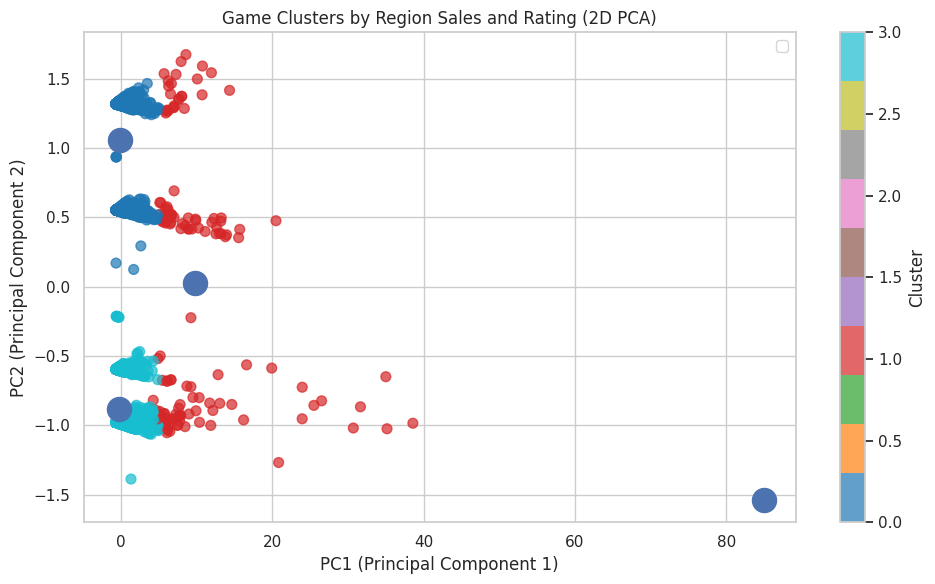

In [ ]:
#we reduce dimensions for plotting purposes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#cluster projection
centroids_pca = pca.transform(kmeans.cluster_centers_)

#cluster visualizing
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.7)

#centroids as black stars
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    s=300,

)
#plotting tags
plt.title("Game Clusters by Region Sales and Rating (2D PCA)")
plt.xlabel("PC1 (Principal Component 1)")  #linear combinaation of all variables
plt.ylabel("PC2 (Principal Component 2)")  #second main direction
plt.colorbar(scatter, label="Cluster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
# Ensure that "Cluster" and "Rating" columns exist and contain no NaN values
rating_counts = df_clean.dropna(subset=["Cluster", "Rating"])

# Group by cluster and rating and count entries
cluster_rating_counts = rating_counts.groupby(["Cluster", "Rating"]).size().unstack(fill_value=0)

# Print the count table
print("Game count per Rating in each Cluster:")
print(cluster_rating_counts)

Game count per Rating in each Cluster:
Rating   AO     E  E10+  EC  K-A     M  RP     T
Cluster                                         
0         0     0     0   0    3  1540   3  2977
1         0    55    10   0    0    50   0    26
2         0     1     0   0    0     0   0     0
3         1  3987  1431   8    0     0   0     0


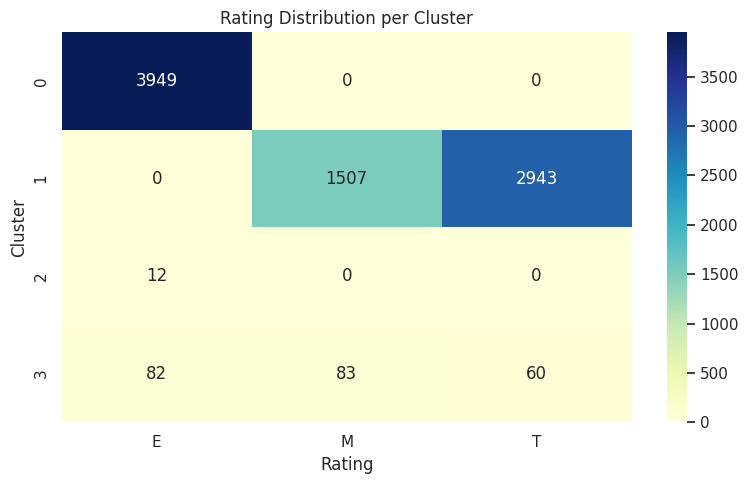

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the rating to numeric values
df_clean["Rating_Num"] = df_clean["Rating"].map({"E": 0, "T": 1, "M": 2})

# Drop games with missing values in required columns
df_clean = df_clean.dropna(subset=["Rating_Num", "NA_Sales", "EU_Sales", "JP_Sales"])

# Select features and scale them
X = df_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Rating_Num"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)

# Group by cluster and rating to get counts
cluster_rating_counts = df_clean.groupby(["Cluster", "Rating"]).size().unstack(fill_value=0)

# Display as a heatmap for visual clarity
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_rating_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Rating Distribution per Cluster")
plt.xlabel("Rating")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


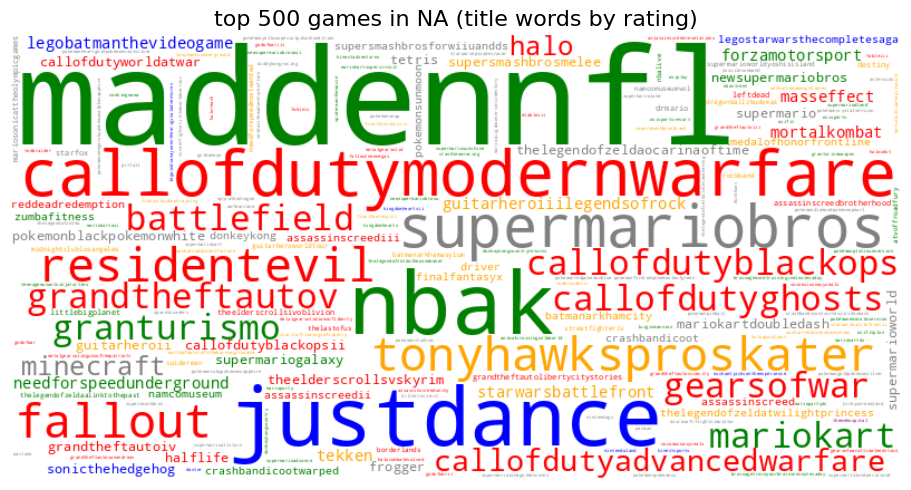

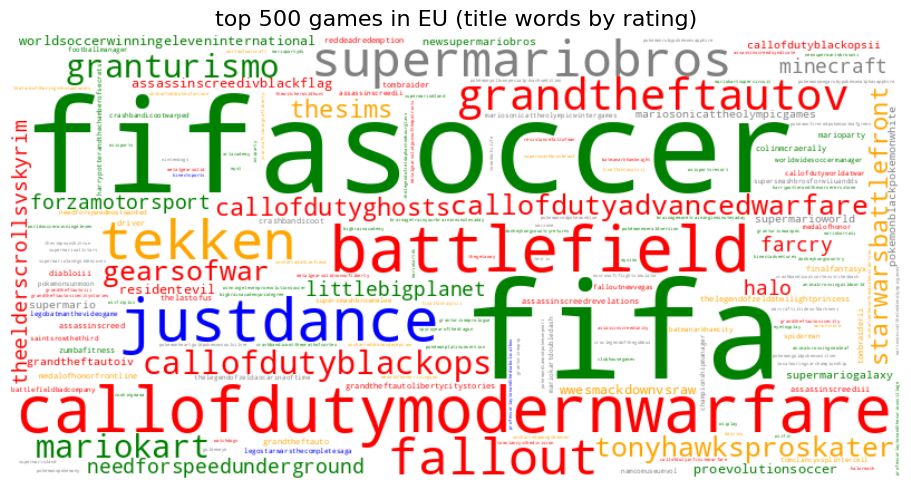

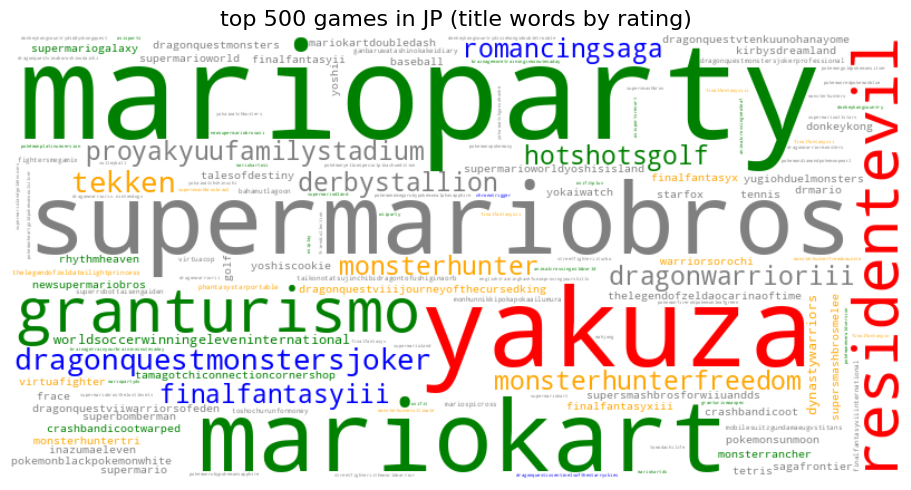

In [ ]:
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# set up color mapping for ratings
rating_colors = {
    "e": "green",
    "e10+": "blue",
    "t": "orange",
    "m": "red",
    "ao": "black",
    "rp": "gray",
    "k-a": "purple",
}

# get most frequent rating for each word
word_rating_map = defaultdict(lambda: "rp")
word_counts_by_rating = defaultdict(lambda: defaultdict(int))

for _, row in df.dropna(subset=["Name_clean", "Rating"]).iterrows():
    words = row["Name_clean"].split()
    rating = row["Rating"].lower()
    for word in words:
        word_counts_by_rating[word][rating] += 1

for word, rating_count in word_counts_by_rating.items():
    dominant_rating = max(rating_count, key=rating_count.get)
    word_rating_map[word] = dominant_rating

# custom color function based on rating
def color_func_by_rating(word, **kwargs):
    rating = word_rating_map.get(word, "rp")
    return rating_colors.get(rating, "gray")

# quick function to show wordcloud by region
def plot_wordcloud_by_rating(region_df, title):
    text = ' '.join(region_df['Name_clean'].dropna())
    freqs = Counter(text.split())
    wc = WordCloud(
        width=800,
        height=400,
        max_words=200,
        max_font_size=120,
        relative_scaling=0.5,
        color_func=color_func_by_rating,
        background_color='white'
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# top 500 by region
top_na = df.sort_values("NA_Sales", ascending=False).head(500)
top_eu = df.sort_values("EU_Sales", ascending=False).head(500)
top_jp = df.sort_values("JP_Sales", ascending=False).head(500)

# show the clouds
plot_wordcloud_by_rating(top_na, "top 500 games in NA (title words by rating)")
plot_wordcloud_by_rating(top_eu, "top 500 games in EU (title words by rating)")
plot_wordcloud_by_rating(top_jp, "top 500 games in JP (title words by rating)")
